In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal



In [161]:
df1 = pd.read_pickle('/content/EDA_df.pkl')
df1.head()

,id,name,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,...,drama,family,kids,mystery,reality,sci-fi & fantasy,soap,talk,war & politics & news,action & adventure & western
0,71446,money heist,1.0,41,17836,8.257,False,2017-05-02,2021-12-03,False,...,1,0,0,0,0,0,0,0,0,0
1,69050,riverdale,1.0,137,13180,8.479,False,2017-01-26,2023-08-23,False,...,1,0,0,1,0,0,0,0,0,0
2,93405,squid game,1.0,9,13053,7.831,False,2021-09-17,2021-09-17,True,...,1,0,0,1,0,0,0,0,0,1
3,71712,the good doctor,1.0,116,11768,8.503,False,2017-09-25,2023-05-01,True,...,1,0,0,0,0,0,0,0,0,0
4,85271,wandavision,1.0,9,11308,8.300,False,2021-01-15,2021-03-05,False,...,1,0,0,1,0,1,0,0,0,0


# Filter the Data Between 01/01/2022 and 31/12/2023
After evaluating the model's performance, which resulted in a relatively low R² value, we decided to narrow the dataset further. The low R² indicates that the model may not be explaining the variation in the target variable (popularity) effectively. In such cases, it's common to filter the data to focus on more relevant, recent information that may provide more insight into the current trends, behaviors, and patterns.

In [162]:

# Convert the 'first_air_date' column to datetime format
df1['first_air_date'] = pd.to_datetime(df1['first_air_date'], errors='coerce')
df1['last_air_date'] = pd.to_datetime(df1['last_air_date'], errors='coerce')

# Filter the data between 01/01/2022 and 31/12/2024
df1 = df1[(df1['first_air_date'] >= '2022-01-01') & (df1['first_air_date'] <= '2023-12-31')]

# Display the filtered data
print(df1.head())

        id                 name  number_of_seasons  number_of_episodes  \
12  119051            wednesday                1.0                   8   
22  100088       the last of us                1.0                   9   
28   94997  house of the dragon                1.0                  10   
30   99966   all of us are dead                1.0                  12   
44   92749          moon knight                1.0                   6   

    vote_count  vote_average  adult first_air_date last_air_date  \
12        7506         8.548  False     2022-11-23    2022-11-23   
22        4065         8.658  False     2023-01-15    2023-03-12   
28        3413         8.448  False     2022-08-21    2022-10-23   
30        3335         8.354  False     2022-01-28    2022-01-28   
44        2392         7.816  False     2022-03-30    2022-05-04   

    in_production  ...  drama family kids  mystery  reality  sci-fi & fantasy  \
12           True  ...      0      0    0        1        0      

In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18822 entries, 12 to 59503
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            18822 non-null  int64         
 1   name                          18822 non-null  object        
 2   number_of_seasons             18822 non-null  float64       
 3   number_of_episodes            18822 non-null  int64         
 4   vote_count                    18822 non-null  int64         
 5   vote_average                  18822 non-null  float64       
 6   adult                         18822 non-null  bool          
 7   first_air_date                18822 non-null  datetime64[ns]
 8   last_air_date                 18822 non-null  datetime64[ns]
 9   in_production                 18822 non-null  bool          
 10  popularity                    18822 non-null  float64       
 11  type                          18

In [164]:
df1.shape

(18822, 53)

#Feature Engineering

#Calculating Duration Between Air Dates and Extracting Year/Month Information

In [165]:
import pandas as pd
from datetime import datetime



# Calculate duration in months
df1['duration_months'] = ((pd.to_datetime(df1['last_air_date']).dt.year - pd.to_datetime(df1['first_air_date']).dt.year) * 12) + \
    (pd.to_datetime(df1['last_air_date']).dt.month - pd.to_datetime(df1['first_air_date']).dt.month)

# Calculate duration in years with better precision
df1['duration_years'] = (pd.to_datetime(df1['last_air_date']) - pd.to_datetime(df1['first_air_date'])).dt.total_seconds() / (60 * 60 * 24 * 365.25)

# Extract year and month from 'first_air_date' and 'last_air_date' (if needed for analysis)
df1['first_air_year'] = pd.to_datetime(df1['first_air_date']).dt.year
df1['first_air_month'] = pd.to_datetime(df1['first_air_date']).dt.month
df1['last_air_year'] = pd.to_datetime(df1['last_air_date']).dt.year
df1['last_air_month'] = pd.to_datetime(df1['last_air_date']).dt.month

# Print the columns to be added
print("Columns to be added to df1:")
print(df1[['duration_months', 'duration_years', 'first_air_year', 'first_air_month', 'last_air_year', 'last_air_month']])

# Drop the original columns: 'first_air_date' and 'last_air_date'
df1.drop(columns=['first_air_date', 'last_air_date'], inplace=True)

# Verify the updated DataFrame
print("\nUpdated DataFrame after dropping original columns:")
print(df1.head())  # Display the first few rows of the updated DataFrame



Columns to be added to df1:
       duration_months  duration_years  first_air_year  first_air_month  \
12                   0        0.000000            2022               11   
22                   2        0.153320            2023                1   
28                   2        0.172485            2022                8   
30                   0        0.000000            2022                1   
44                   2        0.095825            2022                3   
...                ...             ...             ...              ...   
59498                0        0.000000            2023                2   
59499               17        1.426420            2022                4   
59500                1        0.084873            2023               11   
59502                0        0.000000            2023               11   
59503                0        0.000000            2023               11   

       last_air_year  last_air_month  
12              2022            

<ipython-input-165-82af2e7cbaa0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration_months'] = ((pd.to_datetime(df1['last_air_date']).dt.year - pd.to_datetime(df1['first_air_date']).dt.year) * 12) + \
<ipython-input-165-82af2e7cbaa0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration_years'] = (pd.to_datetime(df1['last_air_date']) - pd.to_datetime(df1['first_air_date'])).dt.total_seconds() / (60 * 60 * 24 * 365.25)
<ipython-input-165-82af2e7cbaa0>:14: SettingWithCopyWarning: 
A valu

#Determining Seasons Based on Air Dates

In [166]:
# Function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Determine seasons based on month for first_air_date and last_air_date
df1['first_air_season'] = df1['first_air_month'].apply(get_season)
df1['last_air_season'] = df1['last_air_month'].apply(get_season)

# Print the columns to be added (including the season columns)
print("Columns to be added to df1 with seasons:")
print(df1[['duration_months', 'duration_years', 'first_air_year', 'first_air_month', 'last_air_year', 'last_air_month', 'first_air_season', 'last_air_season']])

# Verify the updated DataFrame with the season columns
print("\nUpdated DataFrame with season columns:")
print(df1.head())  # Display the first few rows of the updated DataFrame


Columns to be added to df1 with seasons:
       duration_months  duration_years  first_air_year  first_air_month  \
12                   0        0.000000            2022               11   
22                   2        0.153320            2023                1   
28                   2        0.172485            2022                8   
30                   0        0.000000            2022                1   
44                   2        0.095825            2022                3   
...                ...             ...             ...              ...   
59498                0        0.000000            2023                2   
59499               17        1.426420            2022                4   
59500                1        0.084873            2023               11   
59502                0        0.000000            2023               11   
59503                0        0.000000            2023               11   

       last_air_year  last_air_month first_air_season last

In [167]:
df1.shape

(18822, 59)

#WORD CLOUD

In [168]:
import nltk
from wordcloud import WordCloud

In [169]:
name=df1['name'].astype('string')
name

,name
12,wednesday
22,the last of us
28,house of the dragon
30,all of us are dead
44,moon knight
...,...
59498,couple goals - love & dreams
59499,take my muffin
59500,jhanak
59502,jokah & tutty


Generating a Word Cloud from the 'Name' Column Data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Most Frequent Words in Names:
Word: de, Count: 445
Word: love, Count: 406
Word: la, Count: 292
Word: world, Count: 130
Word: life, Count: 109
Word: show, Count: 106
Word: les, Count: 105
Word: story, Count: 98
Word: die, Count: 97
Word: le, Count: 96


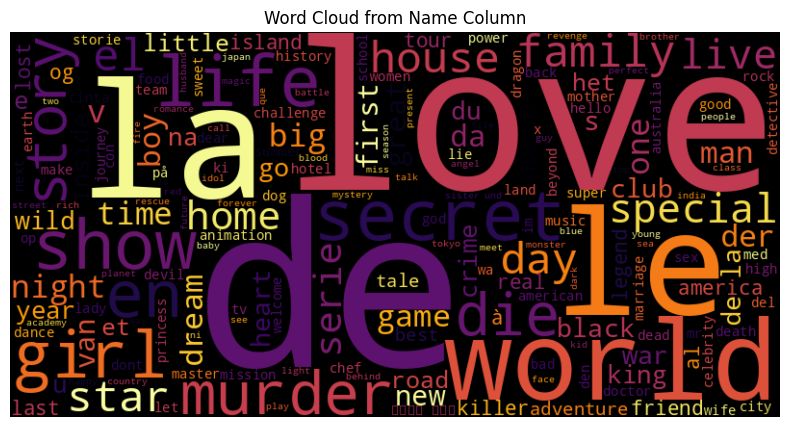

In [170]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Download necessary resources from NLTK
nltk.download('stopwords')

# Convert the 'name' column to lowercase
names = df1['name'].str.lower()

# Remove punctuation using string.punctuation
names = names.str.translate(str.maketrans('', '', string.punctuation))

# Remove stopwords and specific words ("available" and "overview")
stop_words = set(stopwords.words('english'))
filtered_names = names.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Combine the filtered names into a single string
names_data = filtered_names.str.cat(sep=' ')

# Count word frequencies using Counter
word_tokens = names_data.split()
word_counts = Counter(word_tokens)

# Get the top 5 most frequent words
top_10_words = word_counts.most_common(10)

# Print the top 5 most frequent words and their counts
print("Top 10 Most Frequent Words in Names:")
for word, count in top_10_words:
    print(f"Word: {word}, Count: {count}")

wordcloud = WordCloud(
    width=800, height=400,
    background_color='black',
    colormap='inferno'  # Change the colormap here (you can try 'plasma', 'viridis', 'magma', etc.)
).generate(names_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Name Column")
plt.show()


# Top 5 English Words from the List of the Top 10 Above

In [171]:
import pandas as pd
from collections import Counter

# Example DataFrame (replace 'df' with your actual DataFrame)
# df = your_dataframe

# Step 1: Tokenize the words in the 'name' column
df1['name'] = df1['name'].str.lower()  # Convert to lowercase to avoid case-sensitivity issues
words = df1['name'].str.split()  # Split each name into words

# Step 2: Flatten the list of words and count the frequency of each word
all_words = [word for sublist in words for word in sublist]  # Flatten the list of words
word_counts = Counter(all_words)  # Count word frequency

# Step 3: Define the specific words you're interested in
words_to_check = ['love', 'world', 'show','story','life']

# Step 4: Get the count of each of the specific words
word_counts_check = {word: word_counts[word] for word in words_to_check}

print("Value count for specific words:", word_counts_check)

# Step 5: Create dummy variables for the specific words
for word in words_to_check:
    df1[f'name_{word}'] = df1['name'].apply(lambda x: 1 if word in x.split() else 0)

# Step 6: Check the resulting DataFrame
print(df1[['name'] + [f'name_{word}' for word in words_to_check]].head())


Value count for specific words: {'love': 392, 'world': 122, 'show': 100, 'story': 92, 'life': 106}
                   name  name_love  name_world  name_show  name_story  \
12            wednesday          0           0          0           0   
22       the last of us          0           0          0           0   
28  house of the dragon          0           0          0           0   
30   all of us are dead          0           0          0           0   
44          moon knight          0           0          0           0   

    name_life  
12          0  
22          0  
28          0  
30          0  
44          0  


In [172]:
df1.shape

(18822, 64)

In [173]:

df1.drop(columns=['name'], inplace=True)

print(df1.head())

        id  number_of_seasons  number_of_episodes  vote_count  vote_average  \
12  119051                1.0                   8        7506         8.548   
22  100088                1.0                   9        4065         8.658   
28   94997                1.0                  10        3413         8.448   
30   99966                1.0                  12        3335         8.354   
44   92749                1.0                   6        2392         7.816   

    adult  in_production  popularity        type            status  ...  \
12  False           True     164.275    scripted  returning series  ...   
22  False           True     145.629    scripted  returning series  ...   
28  False           True     182.641    scripted  returning series  ...   
30  False           True     107.108    scripted  returning series  ...   
44  False          False      49.843  miniseries             ended  ...   

    first_air_month  last_air_year  last_air_month  first_air_season  \
12

#Overview column

Creating Dummy Variables for Specific Words in the 'Overview' Column and Merging with Modified Sentiment Columns

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal




In [175]:
# Load the DataFrame from the pickle file
df2 = pd.read_pickle('/content/df_with_sentiment_and_overview.pkl')

# Display the first few rows of the DataFrame
print(df2.head())


      id                                           overview  polarity  \
0  71446  to carry out the biggest heist in history, a m... -0.046032   
1  69050  set in the present, the series offers a bold, ...  0.144444   
2  93405  hundreds of cash-strapped players accept a str...  0.055000   
3  71712  shaun murphy, a young surgeon with autism and ... -0.011111   
4  85271  wanda maximoff and vision—two super-powered be...  0.000000   

   subjectivity sentiment  
0      0.560317        -1  
1      0.222222         1  
2      0.345000         1  
3      0.422222        -1  
4      0.000000         0  


The 'df_with_sentiment_and_overview.pkl' presents the sentiment analysis of the 'overview' column in the TV show dataset. The analysis utilizes the TextBlob library to extract the polarity and subjectivity of each overview text, allowing us to categorize the sentiment into three types: positive, neutral, and negative.

In [176]:
text=df2['overview'].astype('string')
text

,overview
0,"to carry out the biggest heist in history, a m..."
1,"set in the present, the series offers a bold, ..."
2,hundreds of cash-strapped players accept a str...
3,"shaun murphy, a young surgeon with autism and ..."
4,wanda maximoff and vision—two super-powered be...
...,...
59499,the story is about a unicorn who has lost his ...
59500,No overview available
59501,the story of 14 contestants who audition to co...
59502,No overview available


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 5 Most Frequent Words:
Word: life, Count: 5754
Word: series, Count: 5251
Word: one, Count: 4551
Word: love, Count: 4488
Word: new, Count: 4251


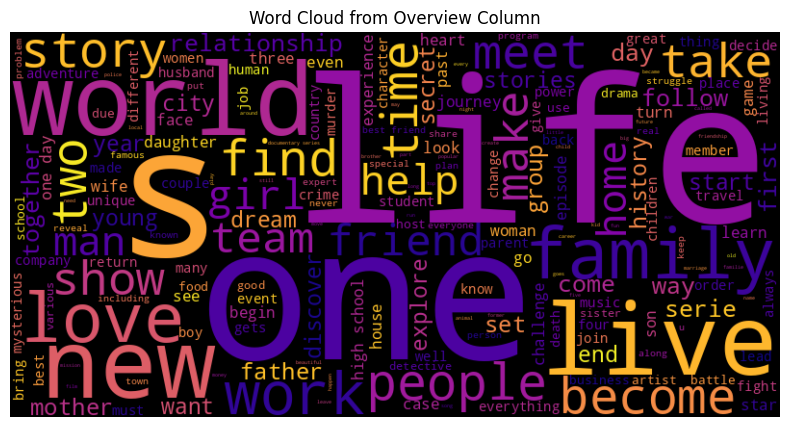

In [177]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' is a pandas Series with your 'overview' column
# Sample text data (replace with actual data)
# text = pd.Series([...])

# Download necessary resources from NLTK
nltk.download('stopwords')

# Convert the 'overview' column to lowercase
text = text.str.lower()

# Remove punctuation using string.punctuation
text = text.str.translate(str.maketrans('', '', string.punctuation))

# Remove stopwords and specific words ("available" and "overview")
stop_words = set(stopwords.words('english')) | {"available", "overview"}  # Add "available" and "overview" to the stopwords set
filtered_text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Combine the filtered text into a single string
text_data = filtered_text.str.cat(sep=' ')

# Count word frequencies using Counter
word_tokens = text_data.split()
word_counts = Counter(word_tokens)

# Get the top 5 most frequent words
top_5_words = word_counts.most_common(5)

# Print the top 5 most frequent words and their counts
print("Top 5 Most Frequent Words:")
for word, count in top_5_words:
    print(f"Word: {word}, Count: {count}")

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Overview Column")
plt.show()


#Word Frequency Analysis in TV Show Overviews

In [178]:
import pandas as pd
from collections import Counter
import re

# Assuming df is already defined and contains the data you provided earlier
# Step 1: Handle NaN values and tokenize the words in the 'overview' column
df2['overview'] = df2['overview'].fillna('').str.lower()  # Handle NaN and convert to lowercase

# Step 2: Clean text to remove punctuation and extra spaces (optional, but ensures better matching)
df2['overview'] = df2['overview'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation

# Step 3: Split the overview into words
words = df2['overview'].str.split()  # Split each overview into words

# Step 4: Flatten the list of words and count the frequency of each word in the entire dataset
all_words = [word for sublist in words for word in sublist]  # Flatten the list of words
word_counts = Counter(all_words)  # Count word frequency

# Step 5: Define the specific words you're interested in
words_to_check = ['love', 'one', 'series', 'life', 'new']

# Step 6: Create columns for the frequency count of each word in the 'overview' column
for word in words_to_check:
    df2[f'overview_{word}'] = df2['overview'].apply(lambda x: x.split().count(word))

# Step 6: Count how many times each word in 'words_to_check' appears across all overviews
word_counts = {word: all_words.count(word) for word in words_to_check}

# Sort the dictionary by its values in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Step 7: Print the value counts for the specific words
print("Value count for specific words:", sorted_word_counts)

# Step 7: Add the 'id' column to df for merging and checking
df2_overview = df2[['id', 'overview'] + [f'overview_{word}' for word in words_to_check]]

# Step 8: Check the resulting df DataFrame
print(df2_overview.head())


Value count for specific words: {'life': 5769, 'series': 5256, 'one': 4558, 'love': 4514, 'new': 4258}
      id                                           overview  overview_love  \
0  71446  to carry out the biggest heist in history a my...              0   
1  69050  set in the present the series offers a bold su...              0   
2  93405  hundreds of cashstrapped players accept a stra...              0   
3  71712  shaun murphy a young surgeon with autism and s...              0   
4  85271  wanda maximoff and visiontwo superpowered bein...              0   

   overview_one  overview_series  overview_life  overview_new  
0             0                0              0             0  
1             0                1              1             0  
2             0                0              0             0  
3             0                0              1             0  
4             0                0              0             0  


In [179]:
df2_overview = df2_overview.merge(df2[['id', 'polarity', 'subjectivity', 'sentiment']], on='id', how='left')

# Step 10: Check the resulting df DataFrame
print(df2_overview.head())


      id                                           overview  overview_love  \
0  71446  to carry out the biggest heist in history a my...              0   
1  69050  set in the present the series offers a bold su...              0   
2  93405  hundreds of cashstrapped players accept a stra...              0   
3  71712  shaun murphy a young surgeon with autism and s...              0   
4  85271  wanda maximoff and visiontwo superpowered bein...              0   

   overview_one  overview_series  overview_life  overview_new  polarity  \
0             0                0              0             0 -0.046032   
1             0                1              1             0  0.144444   
2             0                0              0             0  0.055000   
3             0                0              1             0 -0.011111   
4             0                0              0             0  0.000000   

   subjectivity sentiment  
0      0.560317        -1  
1      0.222222         

#Merge New Columns from 'Overview' Analysis into the df1 Dataset

In [180]:
df1 = df1.merge(df2, on='id', how='left')
print(df1.head())

       id  number_of_seasons  number_of_episodes  vote_count  vote_average  \
0  119051                1.0                   8        7506         8.548   
1  100088                1.0                   9        4065         8.658   
2   94997                1.0                  10        3413         8.448   
3   99966                1.0                  12        3335         8.354   
4   92749                1.0                   6        2392         7.816   

   adult  in_production  popularity        type            status  ...  \
0  False           True     164.275    scripted  returning series  ...   
1  False           True     145.629    scripted  returning series  ...   
2  False           True     182.641    scripted  returning series  ...   
3  False           True     107.108    scripted  returning series  ...   
4  False          False      49.843  miniseries             ended  ...   

   name_life                                           overview  polarity  \
0        

In [181]:
df1.shape

(18822, 72)

# Drop 'overview' and 'production_companies'
'production_companies' showed lower R² across different models, suggesting that it might not provide valuable predictive power and could be adding noise.

In [182]:
df1=df1.drop(columns=['overview','production_companies'])

In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18822 entries, 0 to 18821
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            18822 non-null  int64   
 1   number_of_seasons             18822 non-null  float64 
 2   number_of_episodes            18822 non-null  int64   
 3   vote_count                    18822 non-null  int64   
 4   vote_average                  18822 non-null  float64 
 5   adult                         18822 non-null  bool    
 6   in_production                 18822 non-null  bool    
 7   popularity                    18822 non-null  float64 
 8   type                          18822 non-null  category
 9   status                        18822 non-null  category
 10  origin_country                18822 non-null  int64   
 11  episode_run_time              18822 non-null  int64   
 12  languages_count               18822 non-null  

#Hyperparameters
#Multivariable Analysis

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

In [185]:
y=df1['popularity']
X = df1.drop(columns=['popularity'])

#LabelEncoder

In [186]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for categorical columns in X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Transform the categorical column into numeric



In [187]:
from sklearn.svm import SVR  # Change from LinearSVC to SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import pandas as pd
import numpy as np

# Fit models and determine if a feature is selected (1) or not (0)

# Lasso Regression
lasso = Lasso(alpha=0.1).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Ridge Regression
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)


# Gradient Boosting
gb = GradientBoostingRegressor().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

# Random Forest
rf = RandomForestRegressor().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,

    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso',  'GradientBoost', 'RandomForest', 'Ridge']].sum(axis=1)

# Output the results
print(selection_df)


               Feature  Lasso  GradientBoost  RandomForest  Ridge  Sum
0                   id      1              1             1      1    4
1    number_of_seasons      0              0             0      0    0
2   number_of_episodes      1              1             1      1    4
3           vote_count      1              1             1      1    4
4         vote_average      1              1             1      1    4
..                 ...    ...            ...           ...    ...  ...
64       overview_love      0              1             1      1    3
65        overview_one      0              1             1      1    3
66     overview_series      1              0             1      1    3
67       overview_life      0              0             1      1    2
68        overview_new      0              1             1      1    3

[69 rows x 6 columns]


#Creating DataFrame with most valuable variables

Selected variables - recommended by 3 or more models

In [188]:
 #Selecting variables with a sum of selections >= 4
final_var = selection_df[selection_df['Sum'] >= 4]['Feature'].tolist()
df_model = df1[final_var].copy()
df_model['popularity'] = df1['popularity'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18822 entries, 0 to 18821
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            18822 non-null  int64   
 1   number_of_episodes            18822 non-null  int64   
 2   vote_count                    18822 non-null  int64   
 3   vote_average                  18822 non-null  float64 
 4   type                          18822 non-null  category
 5   status                        18822 non-null  category
 6   origin_country                18822 non-null  int64   
 7   episode_run_time              18822 non-null  int64   
 8   en                            18822 non-null  int64   
 9   zh                            18822 non-null  int64   
 10  nl                            18822 non-null  int64   
 11  pt                            18822 non-null  int64   
 12  tokyo mx                      18822 non-null  

In [189]:


# Save the DataFrame as a pickle file
df_model.to_pickle('df_model.pkl')

# Output the result to verify
df_model.info()  # Display DataFrame information to check if everything is correct



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18822 entries, 0 to 18821
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            18822 non-null  int64   
 1   number_of_episodes            18822 non-null  int64   
 2   vote_count                    18822 non-null  int64   
 3   vote_average                  18822 non-null  float64 
 4   type                          18822 non-null  category
 5   status                        18822 non-null  category
 6   origin_country                18822 non-null  int64   
 7   episode_run_time              18822 non-null  int64   
 8   en                            18822 non-null  int64   
 9   zh                            18822 non-null  int64   
 10  nl                            18822 non-null  int64   
 11  pt                            18822 non-null  int64   
 12  tokyo mx                      18822 non-null  